In [46]:
%run ../includes/common-20230414.ipynb

CPython 2024-01-04T04:18:52.553094


CPU times: user 749 µs, sys: 284 µs, total: 1.03 ms
Wall time: 1.28 ms


In [47]:
dfc_raw = get_df()
dfs_01 = get_data(dfc_raw, default_sample_ratio=.1)

postproc failed
9065


/tmp/ipykernel_46227/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)
/tmp/ipykernel_46227/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)


,Region,PlotLabel,P100ServiceTimePercent@10m,P50ServiceTimePercent@10m,Dummy
0,Region1,Baleen All on Partial Hit,21.252335,71.824366,Same
1,Region1,Baleen ML-Range on Partial Hit,20.760901,71.252371,Same
2,Region1,Baleen No prefetching,41.091105,70.944605,Same
3,Region1,OPT AP OPT-Range on OPT-Ep-Start,19.535805,62.393542,Same
4,Region2,Baleen All on Partial Hit,19.898126,68.003725,Same
5,Region2,Baleen ML-Range on Partial Hit,18.999765,69.354414,Same
6,Region2,Baleen No prefetching,25.668847,73.490994,Same
7,Region2,OPT AP OPT-Range on OPT-Ep-Start,16.611748,54.148638,Same
8,Region3,Baleen All on Partial Hit,38.089121,39.008338,Same
9,Region3,Baleen ML-Range on Partial Hit,26.755276,37.501795,Same


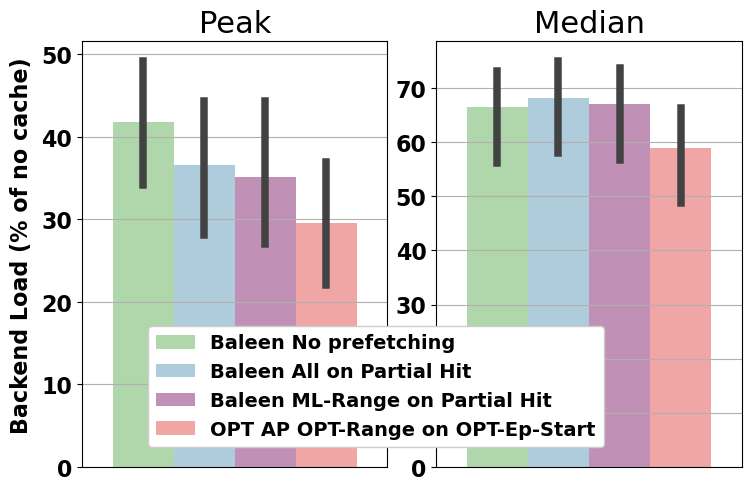

In [48]:
df_ = filter_df(
    # dfs_01['exp'],
    dfc_raw,
    {
        "SampleRatio": 0.1,
        "CanonExp": True,
        "Region": maps.REGIONS_CANON,
        "DWPDNotFar": True,
        "Target DWPD": 7.5,
        "Target Cache Size": ef.DEFAULT_CSIZE,
        "ShortLabel": ["Baleen (No Prefetch)",
                       "Baleen (All on Partial Hit)",
                       "Baleen (ML Prefetch)", 
                       "Baleen (ML-Range on Partial Hit)",
                       "Baleen (OPT Prefetch)",
                       "Baleen (ML-Range on Every Miss)",
                       "OPT AP (OPT Prefetch)"],
    },
)


df_pfrange = filter_df(df_, {
    "ShortLabel": ["Baleen (No Prefetch)",
               "Baleen (All on Partial Hit)",
               # "Baleen (ML Prefetch)", 
               "Baleen (ML-Range on Partial Hit)",
               # "Baleen (OPT Prefetch)",
               "OPT AP (OPT Prefetch)"],
})
y = "P100ServiceTimePercent@10m"
y2 = "P50ServiceTimePercent@10m"
hue = "PlotLabel"
kwargs_ = get_kwargs(df_pfrange, y, hue=hue, errs=True)
kwargs = dict(
    palette=kwargs_["palette"],
    hue_order=kwargs_["hue_order"],
    # legend=False,
)

# df_.groupby(hue).mean().plot.bar(y=y, ax=plt.gca())
df_pfrange = df_pfrange.groupby(["Region", "PlotLabel", "SampleStart"])[[y, y2]].mean().reset_index()
df_pfrange = df_pfrange.groupby(["Region", "PlotLabel"])[[y, y2]].mean().reset_index()
df_pfrange["Dummy"] = "Same"
display(df_pfrange)
fig, axes = plt.subplots(ncols=2)
sns.barplot(data=df_pfrange, y=y, x="Dummy", hue=hue, ax=axes[0], **kwargs)
sns.barplot(data=df_pfrange, y=y2, x="Dummy", hue=hue, ax=axes[1], **kwargs)
# rotation=90)
# postplot(df_)
# plt.xlabel("Prefetch-Range")
# plt.ylabel(nice_ylabel(y))
lines, labels = axes[1].get_legend_handles_labels()
fig.legend(lines, labels, frameon=True, loc='lower center', bbox_to_anchor=(.5, .06), framealpha=1)
for ax in axes:
    ax.set_xlabel("")
    # ax.set_ylabel(nice_ylabel(ax.yaxis.get_label().get_text()), loc='top')
    ax.set_ylabel("")
    ax.set_xticks([], [])
    ax.get_legend().remove()
axes[0].set_title("Peak")
axes[1].set_title("Median")
# fig.supxlabel("Prefetch-Range")
fig.supylabel("Backend Load (% of no cache)")
# plt.legend(frameon=True, loc='lower center')
# maps.export_legend()
savefig("prefetching", "baleen_pfrange_peak,median-st-ratio")

In [49]:
dpf = df_pfrange.groupby(['PlotLabel']).mean()['P100ServiceTimePercent@10m']
display(dpf)
latex_macros({
    'MLRangeOverNoPrefetch': 100 * (1-dpf.loc['Baleen ML-Range on Partial Hit'] / dpf.loc['Baleen No prefetching']),
    'MLRangeOverPartialHit': 100 * (1-dpf.loc['Baleen ML-Range on Partial Hit'] / dpf.loc['Baleen All on Partial Hit']),
    'SystemOPTGap': 100 * (1-dpf.loc['OPT AP OPT-Range on OPT-Ep-Start'] / dpf.loc['Baleen ML-Range on Partial Hit']),
})

/tmp/ipykernel_46227/344174710.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dpf = df_pfrange.groupby(['PlotLabel']).mean()['P100ServiceTimePercent@10m']


PlotLabel
Baleen All on Partial Hit           36.549738
Baleen ML-Range on Partial Hit      35.151307
Baleen No prefetching               41.831807
OPT AP OPT-Range on OPT-Ep-Start    29.589616
Name: P100ServiceTimePercent@10m, dtype: float64

\newcommand{\MLRangeOverNoPrefetch}{16.0\%}
\newcommand{\MLRangeOverPartialHit}{3.8\%}
\newcommand{\SystemOPTGap}{15.8\%}


In [50]:
df_pfs = filter_df(dfc_raw, {
        # "CanonAP": True,
        "CanonExp": True,
        "Region": maps.REGIONS_CANON,
        "DWPDClose": True,
        "PracticalAP": True,
        "Target DWPD": 7.5,
        "Target Cache Size": ef.DEFAULT_CSIZE,
        "ExperimentName": "20230421_alltraces_pfalways",
        # "Prefetch-When": "always",
        # "ShortLabel": ["Baleen (ML-Range on Partial-Hit)"],
})

len(df_pfs)
df_pfs[['Region', 'SampleRatio', 'PlotLabel']].value_counts()

Region   SampleRatio  PlotLabel                     
Region1  0.1          Baleen ML-Range on Every Miss     10
                      Baleen ML-Range on Partial Hit    10
Region5  0.1          Baleen ML-Range on Every Miss     10
                      Baleen ML-Range on Partial Hit    10
Region6  0.1          Baleen ML-Range on Every Miss     10
                      Baleen ML-Range on Partial Hit    10
Region7  0.1          Baleen ML-Range on Every Miss     10
                      Baleen ML-Range on Partial Hit    10
Region2  0.1          Baleen ML-Range on Every Miss      9
                      Baleen ML-Range on Partial Hit     9
Region4  0.1          Baleen ML-Range on Every Miss      9
                      Baleen ML-Range on Partial Hit     9
Region3  0.1          Baleen ML-Range on Every Miss      4
                      Baleen ML-Range on Partial Hit     4
dtype: int64

In [52]:
df_g = pd.concat([df_, df_pfs])

In [53]:
df_g["SampleRatio"].value_counts()

0.1    608
Name: SampleRatio, dtype: int64

/tmp/ipykernel_46227/2748342620.py:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(df_pfwhen_.groupby("PlotLabel").mean())


,P100ServiceTimePercent@10m,P50ServiceTimePercent@10m
PlotLabel,,
Baleen ML-Range on Every Miss,38.655167,72.583731
Baleen ML-Range on ML-When,36.713059,66.021091
Baleen ML-Range on Partial Hit,35.151307,67.004336
Baleen No prefetching,41.831807,66.513521


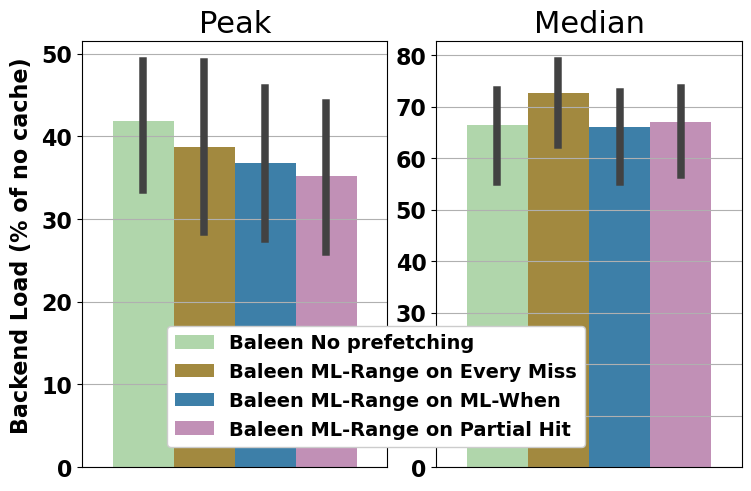

In [54]:
# dfs_1['exp']
df_pfwhen = filter_df(
    df_,
    {
        # "CanonAP": True,
        # "CanonExp": True,
        "Region": maps.REGIONS_CANON,
        "DWPDClose": True,
        # "PracticalAP": True,
        "Target DWPD": 7.5,
        "Target Cache Size": ef.DEFAULT_CSIZE,
        "AdmissionPolicyLabel": "Baleen",
        "ShortLabel": [
            "Baleen (No Prefetch)",
            # "Baleen (All on Partial Hit)",
            "Baleen (ML-Range on Partial Hit)",
            "Baleen (ML-Range on Every Miss)",
            "Baleen (ML Prefetch)",
        ],
    },
)
# df_2

# y = "P100ServiceTimeUtil@10m"
y = "P100ServiceTimePercent@10m"
y2 = "P50ServiceTimePercent@10m"
# y = "IOPSSavedRatio"
hue = "PlotLabel"
kwargs_ = get_kwargs(df_pfwhen, y, hue=hue, errs=True)
kwargs = dict(
    palette=kwargs_["palette"],
    hue_order=kwargs_["hue_order"],
)
# df_.groupby(hue).mean().plot.bar(y=y, ax=plt.gca())
df_pfwhen_ = df_pfwhen.groupby(["Region", "PlotLabel", "SampleStart"])[[y, y2]].mean().reset_index()
df_pfwhen_ = df_pfwhen_.groupby(["Region", "PlotLabel"])[[y,y2]].mean().reset_index()
df_pfwhen_["Dummy"] = "Sxame"
display(df_pfwhen_.groupby("PlotLabel").mean())
# plt.figure(figsize=(6.4, 4.8))

fig, axes = plt.subplots(ncols=2)
sns.barplot(data=df_pfwhen_, y=y, x="Dummy", hue=hue, ax=axes[0], **kwargs)
sns.barplot(data=df_pfwhen_, y=y2, x="Dummy", hue=hue, ax=axes[1], **kwargs)
lines, labels = axes[1].get_legend_handles_labels()
fig.legend(lines, labels, frameon=True, loc='lower center', bbox_to_anchor=(.5, .06), framealpha=1)
for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([], [])
    ax.get_legend().remove()
axes[0].set_title("Peak")
axes[1].set_title("Median")
fig.supylabel("Backend Load (% of no cache)")
savefig("prefetching", "baleen_pfwhen_peak,median-st-ratio")

In [55]:
y3 = maps.l_iop
df_pfwhen_ = df_pfwhen.groupby(["Region", "PlotLabel", "SampleStart"])[[y, y2, y3]].mean().reset_index()
df_pfwhen_ = df_pfwhen_.groupby(["Region", "PlotLabel"])[[y,y2,y3]].mean().reset_index()
df_pfwhen_["Dummy"] = "Sxame"
display(df_pfwhen_.groupby("PlotLabel").mean())
# plt.figure(figsize=(6.4, 4.8))

/tmp/ipykernel_46227/866872162.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(df_pfwhen_.groupby("PlotLabel").mean())


,P100ServiceTimePercent@10m,P50ServiceTimePercent@10m,IO hit ratio (%)
PlotLabel,,,
Baleen ML-Range on Every Miss,38.655167,72.583731,46.679322
Baleen ML-Range on ML-When,36.713059,66.021091,48.223670
Baleen ML-Range on Partial Hit,35.151307,67.004336,49.171043
Baleen No prefetching,41.831807,66.513521,45.889564


,RegionLabel,PlotLabel,P100ServiceTimePercent@10m,Dummy
0,Region1,Baleen ML-Range on ML-When,22.759727,Sxame
1,Region1,Baleen ML-Range on Partial Hit,20.760901,Sxame
2,Region2,Baleen ML-Range on ML-When,22.538443,Sxame
3,Region2,Baleen ML-Range on Partial Hit,18.999765,Sxame
4,Region3,Baleen ML-Range on ML-When,22.769077,Sxame
5,Region3,Baleen ML-Range on Partial Hit,26.755276,Sxame
6,Region4,Baleen ML-Range on ML-When,48.710898,Sxame
7,Region4,Baleen ML-Range on Partial Hit,44.061081,Sxame
8,Region5,Baleen ML-Range on ML-When,39.722614,Sxame
9,Region5,Baleen ML-Range on Partial Hit,37.871009,Sxame


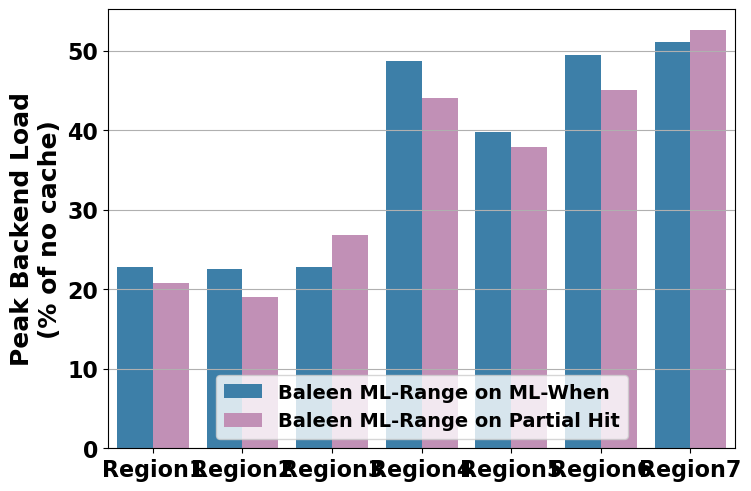

In [56]:
y = "P100ServiceTimePercent@10m"
hue = "PlotLabel"
df_pfwhen_ = filter_df(df_pfwhen, {
    "ShortLabel": [
        # "Baleen (No Prefetch)",
        # "Baleen (ML-Range on Every Miss)",
        "Baleen (ML-Range on Partial Hit)",
        "Baleen (ML Prefetch)",
    ],
})
kwargs_ = get_kwargs(df_pfwhen_, y, hue=hue, errs=True)
kwargs = dict(
    palette=kwargs_["palette"],
    hue_order=kwargs_["hue_order"],
)
# plt.figure(figsize=(6.4, 4.8))
# df_.groupby(hue).mean().plot.bar(y=y, ax=plt.gca())
df_pfwhen_ = df_pfwhen_.groupby(["RegionLabel", "PlotLabel", "SampleStart"])[y].mean().reset_index()
df_pfwhen_ = df_pfwhen_.groupby(["RegionLabel", "PlotLabel"])[y].mean().reset_index()
df_pfwhen_["Dummy"] = "Sxame"
display(df_pfwhen_)

sns.barplot(data=df_pfwhen_, y=y, x="RegionLabel", hue=hue, **kwargs)
# plt.xticks([], [])
# rotation=90)
# postplot(df_)
plt.xlabel("")
plt.ylabel(nice_ylabel(y))
plt.legend(frameon=True, loc='lower center')
# maps.export_legend()
# df_2["Prefetching"].unique())
# savefig("prefetching", "baleen_pfwhen_median-st-ratio")

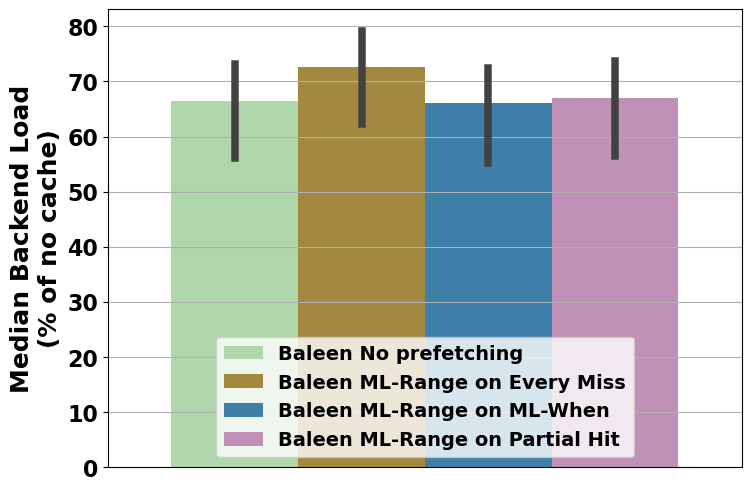

In [57]:
y = "P50ServiceTimePercent@10m"
hue = "PlotLabel"
kwargs_ = get_kwargs(df_pfwhen, y, hue=hue, errs=True)
kwargs = dict(
    palette=kwargs_["palette"],
    hue_order=kwargs_["hue_order"],
)
# plt.figure(figsize=(6.4, 4.8))
# df_.groupby(hue).mean().plot.bar(y=y, ax=plt.gca())
df_pfwhen_ = df_pfwhen.groupby(["Region", "PlotLabel", "SampleStart"])[y].mean().reset_index()
df_pfwhen_ = df_pfwhen.groupby(["Region", "PlotLabel"])[y].mean().reset_index()
df_pfwhen_["Dummy"] = "Sxame"

sns.barplot(data=df_pfwhen_, y=y, x="Dummy", hue=hue, **kwargs)
plt.xticks([], [])
# rotation=90)
# postplot(df_)
plt.xlabel("")
plt.ylabel(nice_ylabel(y))
plt.legend(frameon=True, loc='lower center')
# maps.export_legend()
# df_2["Prefetching"].unique())
savefig("prefetching", "baleen_pfwhen_median-st-ratio")

Missing - not using SHORT_COLORMAP
{'CoinFlip (ML-Range on Partial Hit)', 'RejectX (ML-Range on Partial Hit)', 'CoinFlip (ML Prefetch)', 'RejectX (ML Prefetch)'}
Missing - not using SHORT_MARKERMAP
{'RejectX (ML Prefetch)', 'CoinFlip (All on Partial Hit)', 'RejectX (ML-Range on Partial Hit)', 'CoinFlip (ML Prefetch)', 'Baleen (All on Partial Hit)', 'RejectX (All on Partial Hit)', 'Baleen (ML-Range on Partial Hit)', 'CoinFlip (ML-Range on Partial Hit)'}


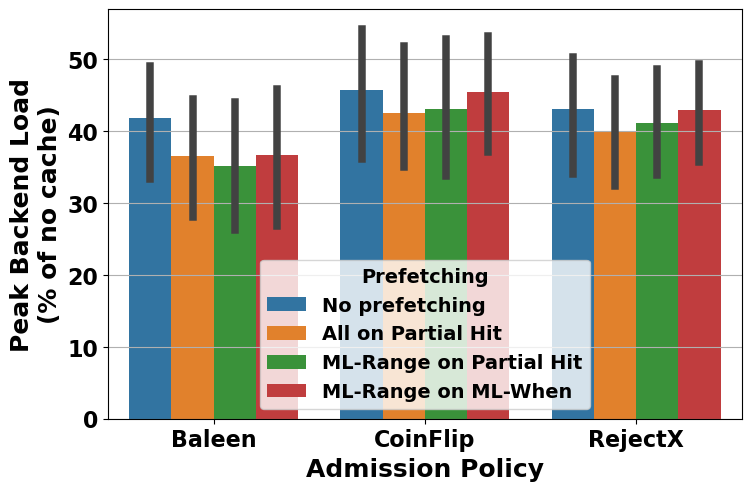

In [58]:
# dfs_1['exp']
df_3 = filter_df(
    dfc_raw,
    {
        "Region": maps.REGIONS_CANON,
        "DWPDClose": True,
        "Target DWPD": 7.5,
        "SampleRatio": .1,
        "Target Cache Size": ef.DEFAULT_CSIZE,
        "AdmissionPolicyLabel": [
            "RejectX",
            "Baleen",
            "CoinFlip",
        ],
        "Prefetch-When": ["never", "partial", "predict"], #, "at_start"],
        # "ShortLabel": ["Baleen (No Prefetch)", "Baleen (All on Partial Hit)", "Baleen (ML-Range on Partial-Hit)", "Baleen (ML-Range on Every Miss)", "Baleen (ML Prefetch)"],
    },
)

df_3["Dummy"] = "Sxame"
y = "P100ServiceTimePercent@10m"
hue = "ShortLabel"
kwargs_ = get_kwargs(df_3, y, errs=True)

df_3 = df_3.groupby(["RegionLabel", "ShortLabel", "AdmissionPolicyLabel", "Prefetching", "SampleStart"])[y].mean().reset_index()
df_3 = df_3.groupby(["RegionLabel", "ShortLabel", "AdmissionPolicyLabel", "Prefetching"])[y].mean().reset_index()

sns.barplot(data=df_3, y=y, x="AdmissionPolicyLabel", hue="Prefetching", hue_order=["No prefetching", "All on Partial Hit", "ML-Range on Partial Hit", "ML-Range on ML-When"])#, **kwargs)
plt.xlabel("Admission Policy")
plt.ylabel(nice_ylabel(y))
plt.legend(title="Prefetching", frameon=True, loc='lower center')
savefig("prefetching", "aps_peak-st-ratio")